**TEAM: Naveen Prabakar, Gregory Chernyavskiy, Riza Danurdoro**

* Imports all necessary libraries for the vegetable classification task.
* Includes data handling libraries: pandas, numpy for data manipulation.
* Includes machine learning libraries: sklearn for splitting data and metrics.
* Includes deep learning libraries: tensorflow.keras for model building and training.
* Includes image processing: ImageDataGenerator, load_img for data augmentation and loading.
* Includes visualization libraries: matplotlib, seaborn for plotting results.
* Includes utilities: zipfile for extracting datasets.
* Specific imports: Conv2D, MaxPooling2D, BatchNormalization, l2, Adam for CNN architecture and optimization.
* Supports data preprocessing, model construction, training, evaluation, and visualization.

In [ ]:
#dependencies
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

* Defines constants for image processing and training.
* Sets IMG_HEIGHT and IMG_WIDTH to 180x180 pixels for input image dimensions.
* Sets BATCH_SIZE to 32, controlling the number of images per training iteration.

In [ ]:
# Image size and batch size
IMG_HEIGHT, IMG_WIDTH = 180, 180
BATCH_SIZE = 32

* Sets DATA_DIR to 'train' for the training dataset.
* Sets DATA_TEST to 'test' for the testing dataset.
* Unzips the zip files

In [ ]:
# Data directory,Upload it to the environment
DATA_DIR = 'train'
DATA_TEST = 'test'

In [ ]:
import zipfile


zip_file = '/content/train.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
zip_file = '/content/test.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
#Prepare data generators
def prepare_data_generators(data_dir, img_height, img_width, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    test_generator = train_datagen.flow_from_directory(
        'test', #use the test file, images the model has never seen before
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
      )

    return train_generator, val_generator, test_generator

In [ ]:
# Prepare data generators
train_generator, val_generator, test_generator = prepare_data_generators(DATA_DIR, IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE)

Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [ ]:
#Build the CNN model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(256, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Build model
num_classes = len(train_generator.class_indices)
model = build_model((IMG_HEIGHT, IMG_WIDTH, 3), num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def trainer(model, train_generator, val_generator, epochs=10):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[early_stopping]
    )

    return history

# Train model
history = trainer(model, train_generator, val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 68s 341ms/step - accuracy: 0.7613 - loss: 5.9753 - val_accuracy: 0.7879 - val_loss: 8.4263
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 57s 328ms/step - accuracy: 0.8594 - loss: 5.7706 - val_accuracy: 0.7179 - val_loss: 6.7283
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 68s 389ms/step - accuracy: 0.8946 - loss: 3.8695 - val_accuracy: 0.4550 - val_loss: 17.3199
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 337ms/step - accuracy: 0.8889 - loss: 3.6702 - val_accuracy: 0.9193 - val_loss: 2.9656
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 57s 326ms/step - accuracy: 0.9016 - loss: 3.0899 - val_accuracy: 0.7950 - val_loss: 4.2600
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 58s 334ms/step - accuracy: 0.8920 - loss: 3.8446 - val_accuracy: 0.8579 - val_loss: 3.0357
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - accuracy: 0.9231 - loss: 2.4270 - val_accuracy: 0.9471 - val_loss: 2.4258
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 68s 387ms/step - accuracy: 0.9322 - loss: 

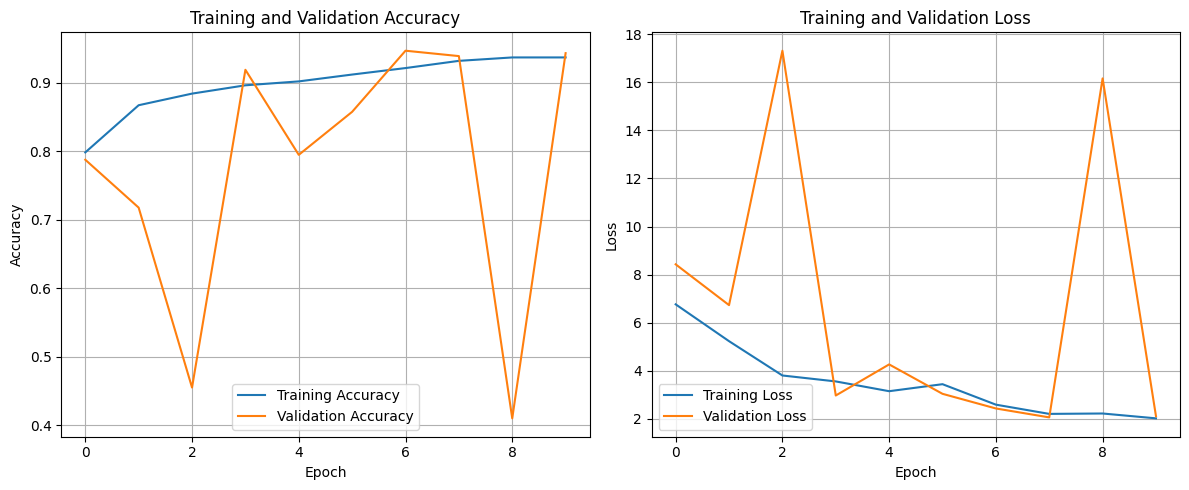

In [ ]:

def visualize_training(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize training
visualize_training(history)

In [ ]:
#With hyper-parameter tuning
def trainer(model, train_generator, val_generator, epochs=20): #more epochs, lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        callbacks=[early_stopping]
    )

    return history

In [ ]:
# Train model
history = trainer(model, train_generator, val_generator, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 68s 349ms/step - accuracy: 0.6464 - loss: 11.2362 - val_accuracy: 0.2229 - val_loss: 15.4817
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 338ms/step - accuracy: 0.8944 - loss: 8.9627 - val_accuracy: 0.2543 - val_loss: 13.1624
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 60s 346ms/step - accuracy: 0.9183 - loss: 7.5412 - val_accuracy: 0.7300 - val_loss: 7.2594
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 69s 395ms/step - accuracy: 0.9361 - loss: 6.2849 - val_accuracy: 0.9514 - val_loss: 5.3849
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - accuracy: 0.9309 - loss: 5.1882 - val_accuracy: 0.9643 - val_loss: 4.4182
Epoch 6/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 60s 345ms/step - accuracy: 0.9453 - loss: 4.2381 - val_accuracy: 0.9764 - val_loss: 3.5423
Epoch 7/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - accuracy: 0.9532 - loss: 3.4505 - val_accuracy: 0.9700 - val_loss: 2.9367
Epoch 8/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 68s 391ms/step - accuracy: 0.9621 - loss

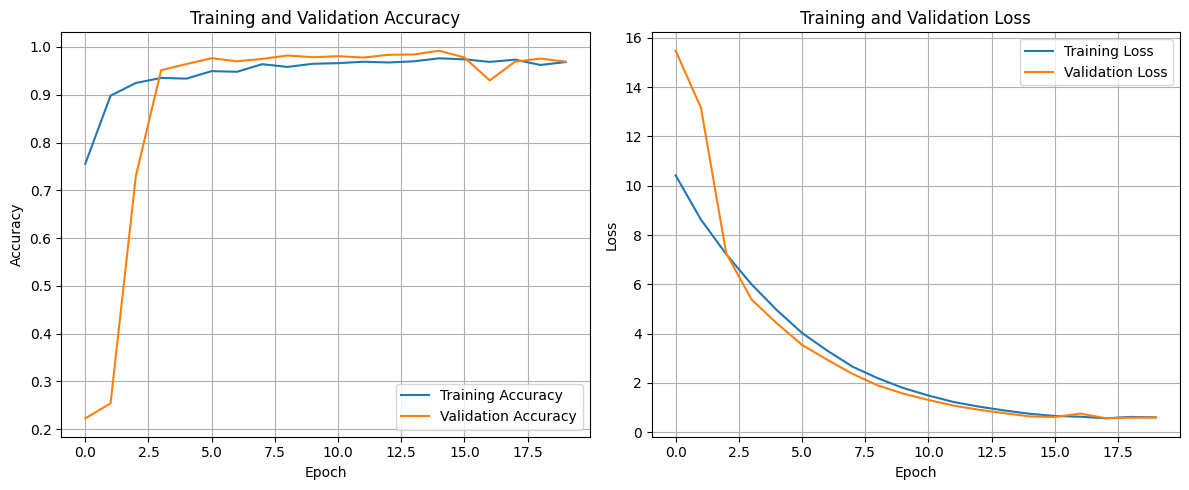

In [ ]:

def visualize_training(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize training
visualize_training(history)

In [ ]:

# Generate predictions
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step


              precision    recall  f1-score   support

           0       0.88      0.97      0.93       200
           1       0.91      0.98      0.94       200
           2       0.98      0.97      0.98       200
           3       1.00      1.00      1.00       200
           4       0.98      0.94      0.96       200
           5       0.97      0.96      0.97       200
           6       1.00      0.87      0.93       200

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



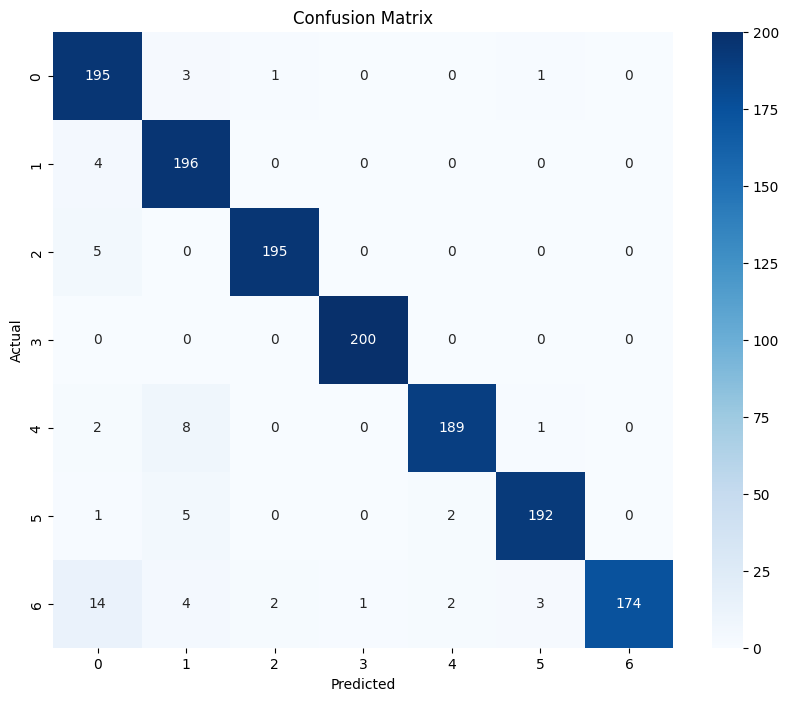

In [ ]:
def evaluate_model(y_pred):
  print(classification_report(test_generator.classes, y_pred))

  plt.figure(figsize=(10,8))
  sns.heatmap(confusion_matrix(test_generator.classes, y_pred),
            annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

evaluate_model(y_pred)

In [ ]:
def misclassified_model(y_pred):
    # Convert predicted probabilities to class indices if necessary
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_classes = np.argmax(y_pred, axis=1)
    else:
        y_pred_classes = y_pred

    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Identify misclassifications
    misclassified_indices = np.where(y_true != y_pred_classes)[0]
    print(f"\nTotal Misclassifications: {len(misclassified_indices)}")

    # Plot up to 20 misclassified images
    print("\nShowing up to 20 misclassified images with actual vs predicted labels:")
    plt.figure(figsize=(16, 16))
    for i, idx in enumerate(misclassified_indices[:20]):
        img_path = test_generator.filepaths[idx]
        img = plt.imread(img_path)

        plt.subplot(5, 4, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Actual: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred_classes[idx]]}", fontsize=10)

    plt.tight_layout()
    plt.show()


Total Misclassifications: 59

Showing up to 20 misclassified images with actual vs predicted labels:


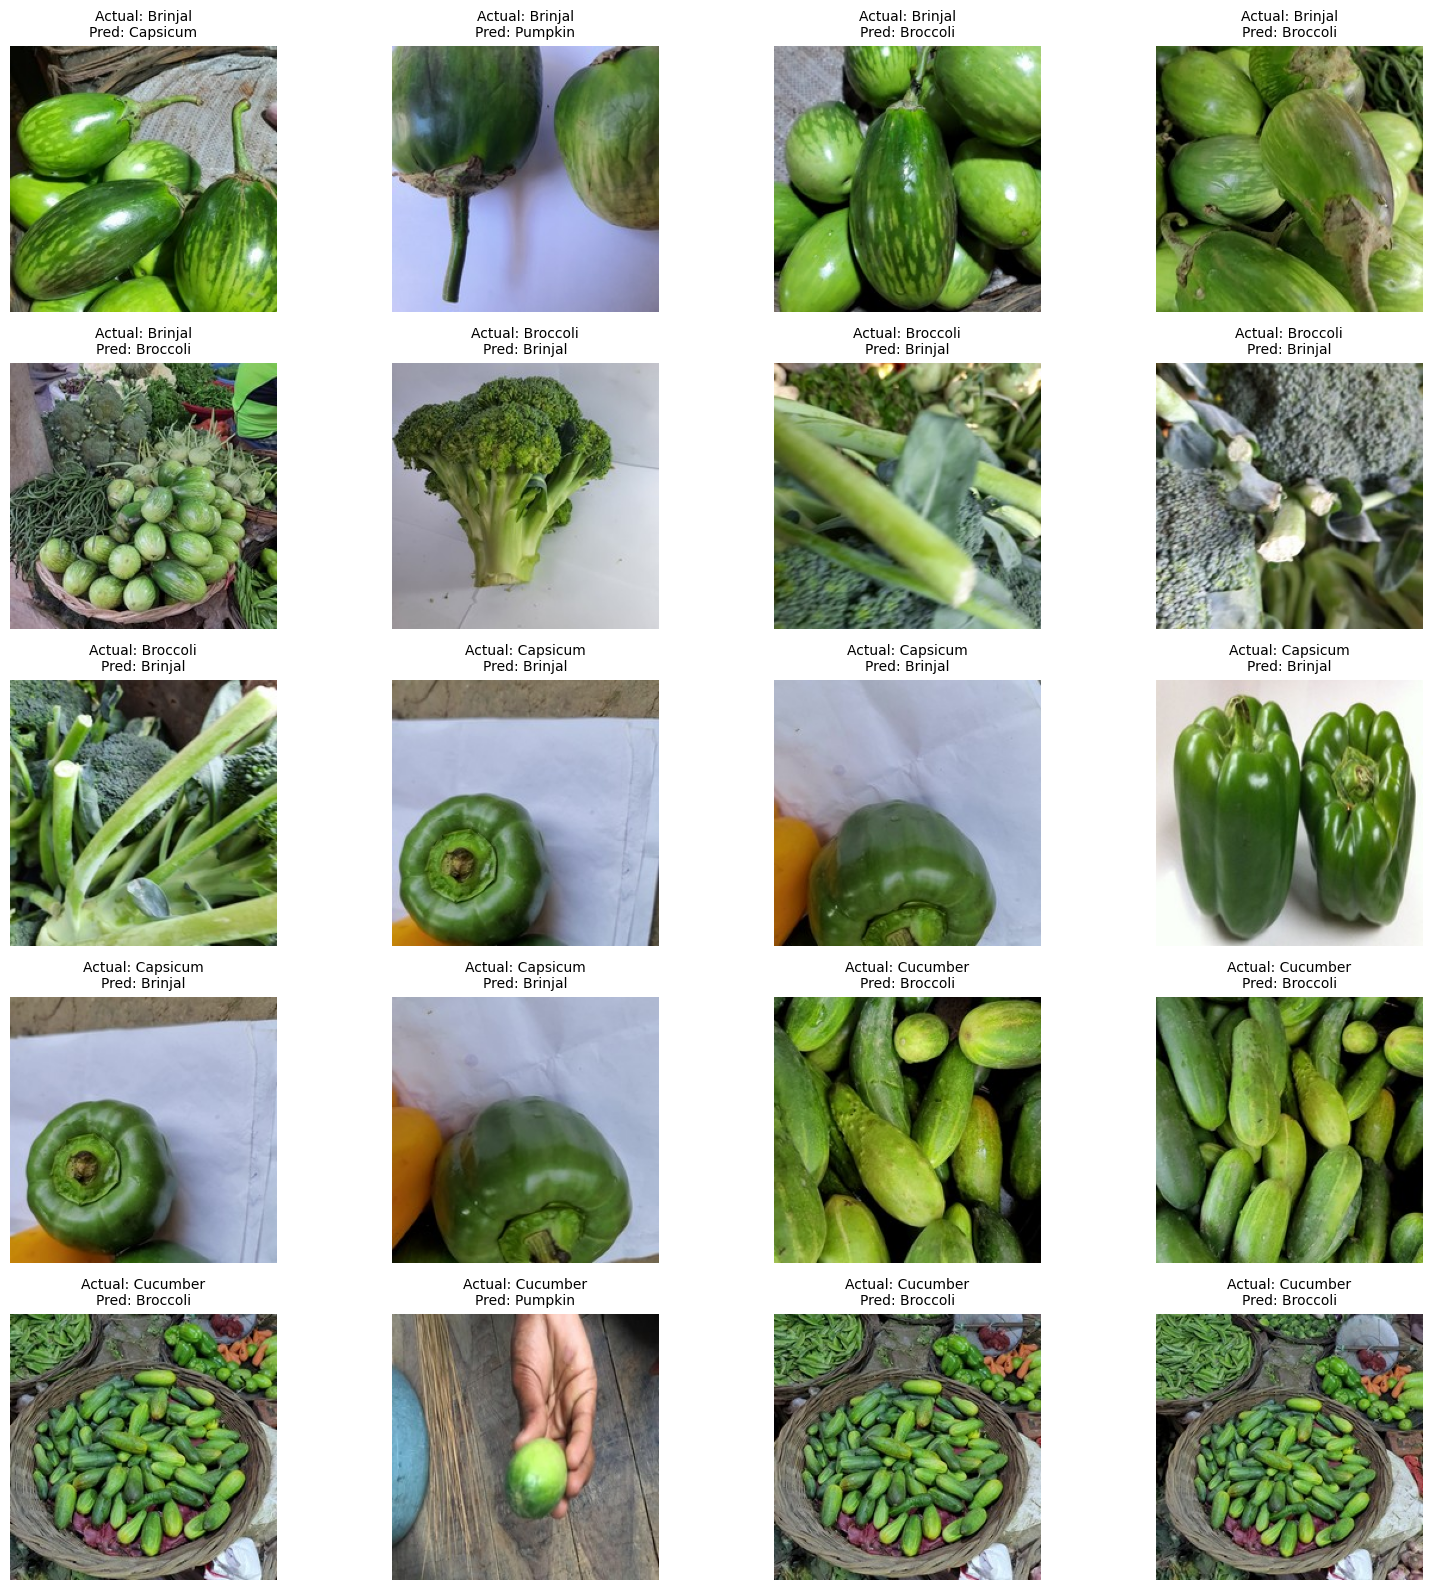

In [ ]:
misclassified_model(y_pred)